# 10 Minutes to mooda

This is a introduction to mooda and the WaterFrame.

A WaterFrame contains three essential elements:

* A pandas DataFrame, located into WaterFrame.data
* A metadata dictionary, located into WaterFrame.metadata
* A meaning dictionary, located into WaterFrame.meaning

The **metadata dictionary** contains information about the DataFrame, i.e. The location of the measurements, the instrument models, some extra notes.

The **meaning dictionary** contains information about the meaning of the keys of the DataFrame. For example, if the DataFrame contains a key called "TEMP", in the meaning dictionary will be the information that explains that "TEMP" means "Seawater temperature."

There are two types of columns in the pandas DataFrame:

* **Parameter columns**: Columns that contain values of a parameter. The key of the column is the name of the parameter.
* **Quality Control columns**: Columns that contain the Quality Control Flag of the values of a parameter. The key of the column is named such as **{parameter name}_QC**.

The **index** of the pandas DataFrame must be **TIME**.


Customarily, we import as follows:

In [1]:
from mooda import WaterFrame
import numpy as np
import pandas as pd

## Object creation

Creating an empty [WaterFrame](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/__init__.md):

In [2]:
wf_empty = WaterFrame()
wf_empty

Memory usage: 264.00 Bytes
There is no data.

Creating a [WaterFrame](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/__init__.md) from a [pandas DataFrame]((https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/from_dataframe.md)), a metadata dictionary and a meanings dictionary:

In [3]:
# Creating a DataFrame
number_of_values = 10
dates = pd.date_range('20180101000000', periods=number_of_values)
x = np.linspace(-np.pi, 4*np.pi, number_of_values)
df = pd.DataFrame({'TEMP': np.sin(x)+10, 'PSAL': np.cos(x)*2 + 30}, index=dates)
df.index.name = 'TIME'

# Creating metadata information
metadata = dict()
metadata['instrument'] = 'CTD'
metadata['latitude'] = '42.03'
metadata['longitude'] = '2.11'

# Creating parameter meanings
meaning = dict()
meaning['TEMP'] = {'long_name': 'sea_water_temperature',
                    'units': 'degree_celsius'}
meaning['PSAL'] = {'long_name': 'sea_water_practical_salinity',
                   'units': 'PSU'}

# Creating the WaterFrame
wf = WaterFrame(df=df, metadata=metadata, meaning=meaning)
wf

Memory usage: 664.00 Bytes
Parameters:
  - TEMP: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %
  - PSAL: sea_water_practical_salinity (PSU)
    - Min value: 28.000
    - Date min value: 2018-01-01 00:00:00
    - Max value: 32.000
    - Date max value: 2018-01-10 00:00:00
    - Mean value: 30.000
    - Values with QC = 1: 0.000 %

Creating a [WaterFrame](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/__init__.md) from a [NetCDF](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/from_netcdf.md) file:

In [4]:
# Download example netcdf data from
# https://github.com/rbardaji/mooda/raw/master/docs/examples/example_data/example.nc
path_netcdf = r"C:\Users\rbard\Google Drive\ok\git\mooda\docs\examples\example_data\example.nc"
wf_netcdf = WaterFrame(path=path_netcdf)
wf_netcdf

Memory usage: 584.00 Bytes
Parameters:
  - TEMP: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %
  - PSAL: sea_water_practical_salinity (PSU)
    - Min value: 28.000
    - Date min value: 2018-01-01 00:00:00
    - Max value: 32.000
    - Date max value: 2018-01-10 00:00:00
    - Mean value: 30.000
    - Values with QC = 1: 0.000 %

Creating a [WaterFrame](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/__init__.md) from a [CSV](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/from_csv.md) file:

In [5]:
path_csv = r"https://github.com/rbardaji/mooda/raw/master/docs/examples/example_data/example.csv"
wf_csv = WaterFrame()
wf_csv.from_csv(path_csv, comment="#", sep=";", index_col=0)
wf_csv

Memory usage: 1.41 KBytes
Parameters:
  - TEMP: Parameter without meaning
    - Min value: 9.015
    - Date min value: 2018-01-02
    - Max value: 10.866
    - Date max value: 2018-01-04
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %
  - PSAL: Parameter without meaning
    - Min value: 28.000
    - Date min value: 2018-01-01
    - Max value: 32.000
    - Date max value: 2018-01-10
    - Mean value: 30.000
    - Values with QC = 1: 0.000 %

## Viewing data

Display the [metadata information](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/info_metadata.md):

In [6]:
print("METADATA:")
print(wf.info_metadata())

METADATA:
  - instrument: CTD
  - latitude: 42.03
  - longitude: 2.11


Display the [meaning information](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/info_meaning.md):

In [7]:
print("MEANING:")
print(wf.info_meaning())

MEANING:
  - TEMP
    - long_name: sea_water_temperature
    - units: degree_celsius
  - PSAL
    - long_name: sea_water_practical_salinity
    - units: PSU


[parameters()](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/parameters.md) returns a list with the keys of the DataFrame, but expluding the QC columns.

In [8]:
wf.parameters()

['TEMP', 'PSAL']

Checking the [min](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/min.md), [max](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/max.md) and [mean](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/mean.md) of a parameter:

In [9]:
time_min, value_min = wf.min('TEMP')
time_max, value_max = wf.max('TEMP')
value_mean = wf.mean('TEMP')

print("TEMPERATURE INFO:")
print(f"Min value: {value_min}, at {time_min}")
print(f"Max value: {value_max}, at {time_max}")
print(f"Mean value: {value_mean}")

TEMPERATURE INFO:
Min value: 9.015192246987793, at 2018-01-02 00:00:00
Max value: 10.86602540378444, at 2018-01-04 00:00:00
Mean value: 9.916090036882272


Know how many RAM [memory](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/momory_usage.md) is using the WaterFrame.

In [10]:
print(wf.memory_usage(), "Bytes")

664 Bytes


## Selection 

### Getting metadata

Here is how to access to the metadata diccionary:

In [11]:
wf.metadata

{'instrument': 'CTD', 'latitude': '42.03', 'longitude': '2.11'}

Adding new element to the metadata:

In [12]:
wf.metadata['new information'] = 'example of indformation'
print(wf.info_metadata())

  - instrument: CTD
  - latitude: 42.03
  - longitude: 2.11
  - new information: example of indformation


Deleting an element of the metadata:

In [13]:
del wf.metadata['new information']
print(wf.info_metadata())

  - instrument: CTD
  - latitude: 42.03
  - longitude: 2.11


### Getting meaning 

Here is how to access to the meaning dictionary:

In [14]:
wf.meaning

{'TEMP': {'long_name': 'sea_water_temperature', 'units': 'degree_celsius'},
 'PSAL': {'long_name': 'sea_water_practical_salinity', 'units': 'PSU'}}

Display an element of meaning:

In [15]:
wf.meaning['TEMP']

{'long_name': 'sea_water_temperature', 'units': 'degree_celsius'}

In [16]:
wf.meaning['TEMP']['long_name']

'sea_water_temperature'

Adding new element to meaning:

In [17]:
wf.meaning['TEMP']['other_name'] = 'other name for the parameter'
print(wf.info_meaning())

  - TEMP
    - long_name: sea_water_temperature
    - units: degree_celsius
    - other_name: other name for the parameter
  - PSAL
    - long_name: sea_water_practical_salinity
    - units: PSU


Delete an element of meaning:

In [18]:
del wf.meaning['TEMP']['other_name']
print(wf.info_meaning())

  - TEMP
    - long_name: sea_water_temperature
    - units: degree_celsius
  - PSAL
    - long_name: sea_water_practical_salinity
    - units: PSU


### Getting data

WaterFrame.data is a pandas DataFrame. You can use all the pandas Dataframe methods.
This is how to access to the DataFrame:

In [19]:
wf.data

,TEMP,PSAL,TEMP_QC,PSAL_QC
TIME,,,,
2018-01-01,10.000000,28.000000,0,0
2018-01-02,9.015192,30.347296,0,0
2018-01-03,10.342020,31.879385,0,0
2018-01-04,10.866025,29.000000,0,0
2018-01-05,9.357212,28.467911,0,0
2018-01-06,9.357212,31.532089,0,0
2018-01-07,10.866025,31.000000,0,0
2018-01-08,10.342020,28.120615,0,0
2018-01-09,9.015192,29.652704,0,0


However, you can select a single column, which yields a Series, equivalent to *wf.data.TEMP*:

In [20]:
wf['TEMP']

TIME
2018-01-01    10.000000
2018-01-02     9.015192
2018-01-03    10.342020
2018-01-04    10.866025
2018-01-05     9.357212
2018-01-06     9.357212
2018-01-07    10.866025
2018-01-08    10.342020
2018-01-09     9.015192
2018-01-10    10.000000
Freq: D, Name: TEMP, dtype: float64

Selecting via [], which slices the rows.

In [21]:
wf[0:3]

,TEMP,PSAL,TEMP_QC,PSAL_QC
TIME,,,,
2018-01-01,10.000000,28.000000,0,0
2018-01-02,9.015192,30.347296,0,0
2018-01-03,10.342020,31.879385,0,0


#### Boolean Indexing

Using a single column’s values to select data.

In [22]:
wf[wf['TEMP'] > 10]

,TEMP,PSAL,TEMP_QC,PSAL_QC
TIME,,,,
2018-01-03,10.342020,31.879385,0,0
2018-01-04,10.866025,29.000000,0,0
2018-01-07,10.866025,31.000000,0,0
2018-01-08,10.342020,28.120615,0,0


Using the isin() method for filtering:

In [23]:
wf1 = wf.copy()
wf1['filter'] = [1, 1 ,1 , 1, 0, 0, 0, 0, 1, 1]
wf1.data

,TEMP,PSAL,TEMP_QC,PSAL_QC,filter
TIME,,,,,
2018-01-01,10.000000,28.000000,0,0,1
2018-01-02,9.015192,30.347296,0,0,1
2018-01-03,10.342020,31.879385,0,0,1
2018-01-04,10.866025,29.000000,0,0,1
2018-01-05,9.357212,28.467911,0,0,0
2018-01-06,9.357212,31.532089,0,0,0
2018-01-07,10.866025,31.000000,0,0,0
2018-01-08,10.342020,28.120615,0,0,0
2018-01-09,9.015192,29.652704,0,0,1


In [24]:
wf1[wf1['filter'].isin(['1'])]

,TEMP,PSAL,TEMP_QC,PSAL_QC,filter
TIME,,,,,
2018-01-01,10.000000,28.000000,0,0,1
2018-01-02,9.015192,30.347296,0,0,1
2018-01-03,10.342020,31.879385,0,0,1
2018-01-04,10.866025,29.000000,0,0,1
2018-01-09,9.015192,29.652704,0,0,1
2018-01-10,10.000000,32.000000,0,0,1


### Settings

Setting a new column automatically aligns the data by the indexes.

In [25]:
wf1 = wf.copy()
wf1['DEPTH'] = 1
wf1['DEPTH_QC'] = 0
depth_meaning = {'long_name': 'Depth of the water column',
                 'units': 'meters'}
wf1.meaning['DEPTH'] = depth_meaning
wf1.data.head()

,TEMP,PSAL,TEMP_QC,PSAL_QC,DEPTH,DEPTH_QC
TIME,,,,,,
2018-01-01,10.000000,28.000000,0,0,1,0
2018-01-02,9.015192,30.347296,0,0,1,0
2018-01-03,10.342020,31.879385,0,0,1,0
2018-01-04,10.866025,29.000000,0,0,1,0
2018-01-05,9.357212,28.467911,0,0,1,0


## Operations

[Dropping ](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/drop.md) a parameter:

In [26]:
print("Before drop TEMP")
print(wf1)
wf1.drop('DEPTH')
print("")
print("After drop TEMP")
print(wf1)

Before drop TEMP
Memory usage: 824.00 Bytes
Parameters:
  - TEMP: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %
  - PSAL: sea_water_practical_salinity (PSU)
    - Min value: 28.000
    - Date min value: 2018-01-01 00:00:00
    - Max value: 32.000
    - Date max value: 2018-01-10 00:00:00
    - Mean value: 30.000
    - Values with QC = 1: 0.000 %
  - DEPTH: Depth of the water column (meters)
    - Min value: 1.000
    - Date min value: 2018-01-01 00:00:00
    - Max value: 1.000
    - Date max value: 2018-01-01 00:00:00
    - Mean value: 1.000
    - Values with QC = 1: 0.000 %

After drop TEMP
Memory usage: 664.00 Bytes
Parameters:
  - TEMP: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00


[Using only](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/use_only.md) the selected parameters: 

In [27]:
wf1.use_only('TEMP')
wf1

Memory usage: 504.00 Bytes
Parameters:
  - TEMP: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %

[Renaming](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/rename.md) a parameter:

In [28]:
wf1.rename('TEMP', 'TEMPERATURE')
wf1

Memory usage: 504.00 Bytes
Parameters:
  - TEMPERATURE: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %

[Resamplig](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/resample.md) data:

In [29]:
print("Before resampling")
print(wf1.data.head())
print("")
# One data every 2 days. It calculates the mean of the values. 
wf1.resample('2D')
wf1.data.head()
print("Afer resampling")
print(wf1.data.head())

Before resampling
            TEMPERATURE  TEMPERATURE_QC
TIME                                   
2018-01-01    10.000000               0
2018-01-02     9.015192               0
2018-01-03    10.342020               0
2018-01-04    10.866025               0
2018-01-05     9.357212               0

Afer resampling
            TEMPERATURE  TEMPERATURE_QC
TIME                                   
2018-01-01     9.507596               0
2018-01-03    10.604023               0
2018-01-05     9.357212               0
2018-01-07    10.604023               0
2018-01-09     9.507596               0


[Slicing time](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/slice_time.md)  data:

In [30]:
print("Before slicing")
print(wf1.data.head())
# Slicing, from 2018-01-03 00:00:00 to 2018-01-08 00:00:00
wf1.slice_time(start="20180103000000", end="20180108000000")
print("After slicing")
print(wf1.data.head())

Before slicing
            TEMPERATURE  TEMPERATURE_QC
TIME                                   
2018-01-01     9.507596               0
2018-01-03    10.604023               0
2018-01-05     9.357212               0
2018-01-07    10.604023               0
2018-01-09     9.507596               0
After slicing
            TEMPERATURE  TEMPERATURE_QC
TIME                                   
2018-01-03    10.604023               0
2018-01-05     9.357212               0
2018-01-07    10.604023               0


[Concat](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/concat.md) two WaterFrames:

In [31]:
wf1 = wf.copy()
wf1.rename('TEMP', 'TEMP_WF1')
wf1.rename('PSAL', 'PSAL_WF1')

wf2 = wf.copy()
wf2.rename('TEMP', 'TEMP_WF2')
wf2.rename('PSAL', 'PSAL_WF2')

# Concat wf2 in wd1
# Concat
wf1.concat(wf2)

wf1

Memory usage: 1.30 KBytes
Parameters:
  - TEMP_WF1: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %
  - PSAL_WF1: sea_water_practical_salinity (PSU)
    - Min value: 28.000
    - Date min value: 2018-01-01 00:00:00
    - Max value: 32.000
    - Date max value: 2018-01-10 00:00:00
    - Mean value: 30.000
    - Values with QC = 1: 0.000 %
  - TEMP_WF2: sea_water_temperature (degree_celsius)
    - Min value: 9.015
    - Date min value: 2018-01-02 00:00:00
    - Max value: 10.866
    - Date max value: 2018-01-04 00:00:00
    - Mean value: 9.916
    - Values with QC = 1: 0.000 %
  - PSAL_WF2: sea_water_practical_salinity (PSU)
    - Min value: 28.000
    - Date min value: 2018-01-01 00:00:00
    - Max value: 32.000
    - Date max value: 2018-01-10 00:00:00
    - Mean value: 30.000
    - Values with QC = 1: 0.000 

## QC management

In this example, we will work with the "_QC" columns of WaterFrame.data. These columns will tell us if the values of the parameters are correct or doubtful. We call the QC values, QC flags.

Initialy, the QC flags are 0. It means that the parameters have not passed any QC test yet.

In [32]:
wf.data

,TEMP,PSAL,TEMP_QC,PSAL_QC
TIME,,,,
2018-01-01,10.000000,28.000000,0,0
2018-01-02,9.015192,30.347296,0,0
2018-01-03,10.342020,31.879385,0,0
2018-01-04,10.866025,29.000000,0,0
2018-01-05,9.357212,28.467911,0,0
2018-01-06,9.357212,31.532089,0,0
2018-01-07,10.866025,31.000000,0,0
2018-01-08,10.342020,28.120615,0,0
2018-01-09,9.015192,29.652704,0,0


First, we [reset flags](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/reset_flags.md). It means that all QG Flags will be 0. In this case, this step is optional because the flags already are 0.

The [range test](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/range_test.md) check if all values of a parameter are in a reasonable range. If the value is out of range, it changes the QC flag is 4.

The [spike test](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/spike_test.md) detects spikes in the time series. If the value is out of range, it changes the QC flag is 4.

The [flat_test](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/flat_test.md) detects if there are equal consecutive values in the time series.

Finally, we [change the flags](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/flag2falg.md) that are still 0 to 1, that in our case it means that the values are correct.

In [33]:
wf.reset_flag()
wf.range_test()
wf.spike_test()
wf.flat_test()
wf.flag2flag()
wf.data

,TEMP,PSAL,TEMP_QC,PSAL_QC
TIME,,,,
2018-01-01,10.000000,28.000000,1,1
2018-01-02,9.015192,30.347296,1,1
2018-01-03,10.342020,31.879385,1,1
2018-01-04,10.866025,29.000000,1,1
2018-01-05,9.357212,28.467911,1,1
2018-01-06,9.357212,31.532089,4,1
2018-01-07,10.866025,31.000000,1,1
2018-01-08,10.342020,28.120615,1,1
2018-01-09,9.015192,29.652704,1,1


[qc()](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/qc.md) makes all steps in a single function.

In [34]:
out = wf.qc()
wf.data

,TEMP,PSAL,TEMP_QC,PSAL_QC
TIME,,,,
2018-01-01,10.000000,28.000000,1,1
2018-01-02,9.015192,30.347296,1,1
2018-01-03,10.342020,31.879385,1,1
2018-01-04,10.866025,29.000000,1,1
2018-01-05,9.357212,28.467911,1,1
2018-01-06,9.357212,31.532089,4,1
2018-01-07,10.866025,31.000000,1,1
2018-01-08,10.342020,28.120615,1,1
2018-01-09,9.015192,29.652704,1,1


## Plotting

All [plot()](https://github.com/rbardaji/mooda/blob/master/docs/api_reference/waterframe/plot.md) methods of pandas are included in mooda.

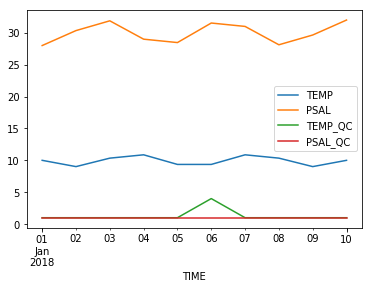

In [36]:
wf.plot()

Text(0, 0.5, 'Degree celsius')

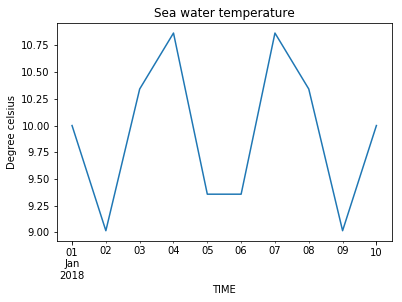

In [40]:
ax = wf['TEMP'].plot(title="Sea water temperature")
ax.set_ylabel("Degree celsius")

### Special plot functions